In [1]:
import tensorflow as tf
print(tf.__version__)

import os
os.environ['PYTHONPATH'] += ':/home/kang/Documents/py/models/research/:/home/kang/Documents/py/models/research/slim/'


1.9.0


In [3]:
%cd /home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/google_colab_work/work/model

lst = os.listdir('real_model')
lf = filter(lambda k: 'model.ckpt-' in k, lst)
last_model = sorted(lf)[-1].replace('.meta', '')


!python /home/kang/Documents/py/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path=/home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/google_colab_work/work/model/ssd_mobilenetV2_finetune_traffic_light_real.config \
    --output_directory=real_model/fine_tuned_model_real_mobilenet \
    --trained_checkpoint_prefix=real_model/$last_model

/home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/google_colab_work/work/model
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
Instructions for updating:
Use `tf.profiler.profile(graph, run_meta, op_log, cmd, options)`. Build `options` with `tf.profiler.ProfileOptionBuilder`. See README.md for details
159 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              0
-min_occurrence             0
-step                       -1
-order_by                   name
-account_type_regexes       _trainable_variables
-start_name_regexes         .*
-trim_name_regexes     

159 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          .*BatchNorm.*,.*Initializer.*,.*Regularizer.*,.*BiasAdd.*
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================
Incomplete shape.

Doc:
scope: The nodes in the model graph are organiz

2019-03-06 14:53:06.165330: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


In [4]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from PIL import ImageDraw
from PIL import ImageColor

from glob import glob

import sys
sys.path.append('/home/kang/Documents/py/models/research/object_detection')
sys.path.append('/home/kang/Documents/py/models/research')

from utils import label_map_util
from utils import visualization_utils as vis_util

%matplotlib inline

In [5]:

SSD_GRAPH_FILE = '/home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/google_colab_work/work/model/real_model/fine_tuned_model_real/frozen_inference_graph.pb'

PATH_TO_LABELS = '/home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/google_colab_work/work/traffic_light_detection_dataset/udacity_label_map.pbtxt'
NUM_CLASSES = 4

In [6]:
def load_graph(graph_file):
    """Loads a frozen inference graph"""
    graph = tf.Graph()
    with graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(graph_file, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return graph


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [7]:
detection_graph = load_graph(SSD_GRAPH_FILE)

In [8]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'Green'}, 2: {'id': 2, 'name': 'Red'}, 3: {'id': 3, 'name': 'Yellow'}, 4: {'id': 4, 'name': 'off'}}


SCORES
[[0.9773842  0.0041982  0.00246122 0.00202756 0.00192166 0.00155546
  0.00148663 0.00134206 0.00132407 0.00131429]]
CLASSES
[[3. 2. 2. 4. 4. 2. 1. 1. 2. 2.]]


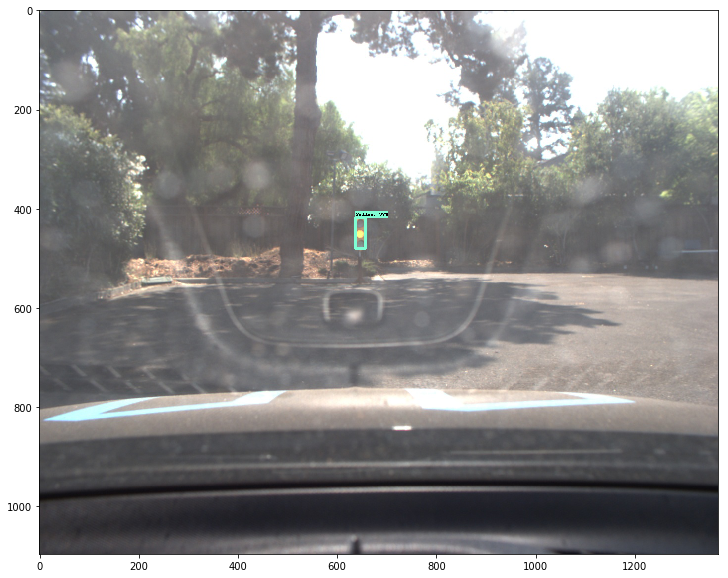

SCORES
[[0.9656742  0.00303381 0.0019902  0.00198122 0.00176928 0.00164571
  0.00162224 0.00161766 0.0014918  0.00148018]]
CLASSES
[[3. 2. 4. 4. 1. 4. 1. 2. 2. 1.]]


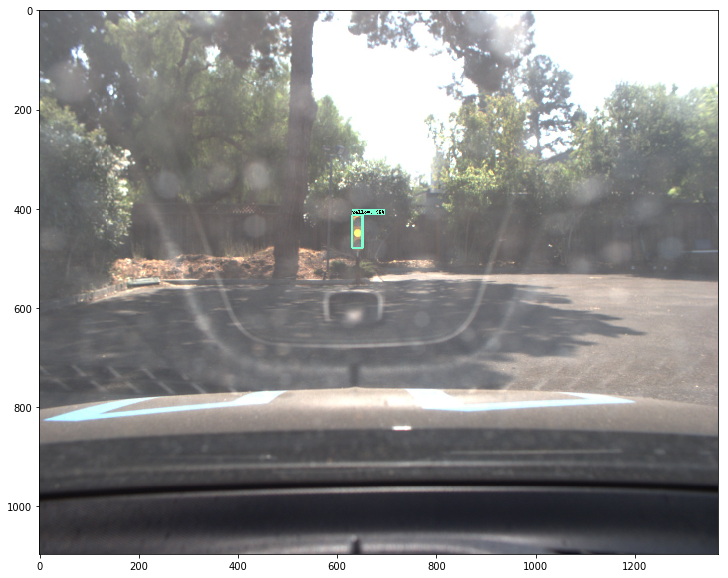

SCORES
[[0.9982755  0.00392701 0.00219431 0.00206418 0.00202712 0.0015544
  0.00155184 0.00149464 0.00148373 0.00144442]]
CLASSES
[[1. 1. 2. 4. 4. 1. 1. 2. 2. 2.]]


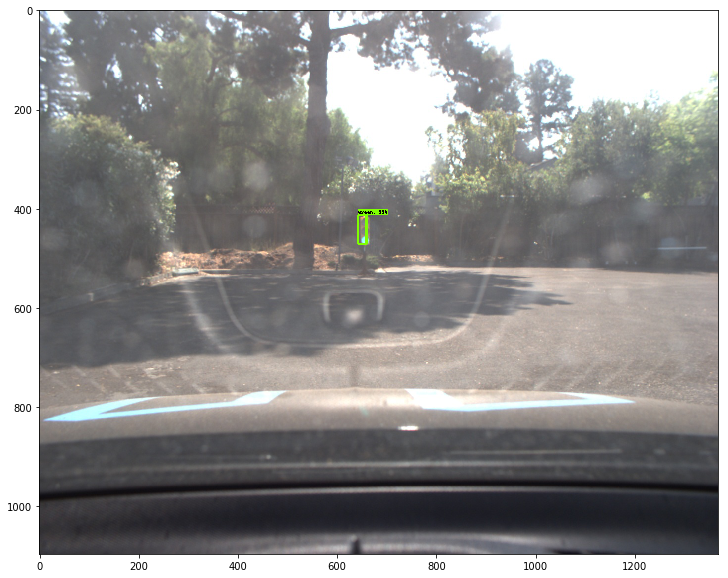

SCORES
[[0.996563   0.00245769 0.00216387 0.00212398 0.00204676 0.00200916
  0.00198472 0.00188283 0.00185297 0.00184546]]
CLASSES
[[1. 2. 4. 4. 2. 4. 3. 4. 4. 3.]]


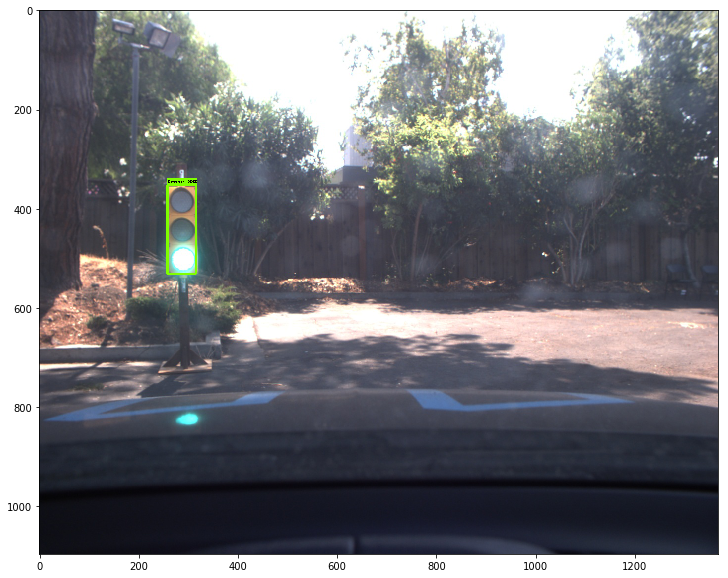

SCORES
[[0.998582   0.00224502 0.00188488 0.00176538 0.00160688 0.00160099
  0.0015539  0.00150047 0.00147818 0.0013857 ]]
CLASSES
[[2. 4. 1. 1. 2. 4. 1. 4. 1. 1.]]


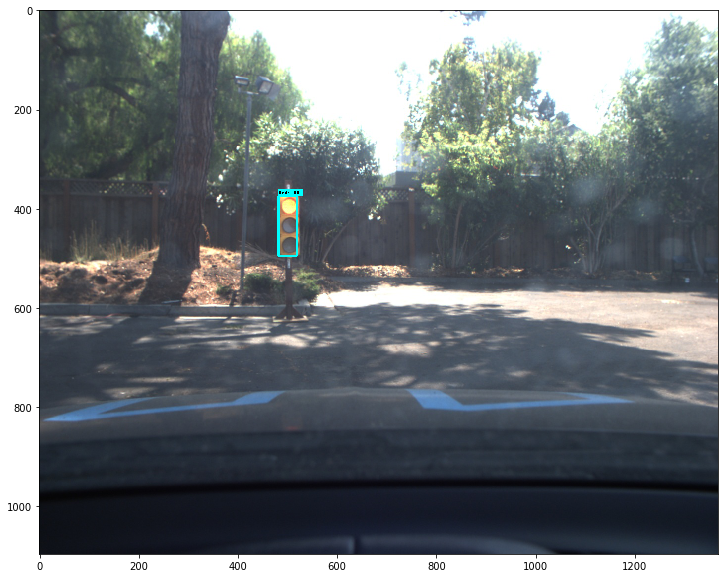

SCORES
[[0.9974612  0.00456731 0.00190188 0.00169774 0.00165902 0.00154845
  0.00153114 0.00144035 0.00137877 0.00136889]]
CLASSES
[[2. 2. 1. 2. 3. 4. 3. 1. 3. 1.]]


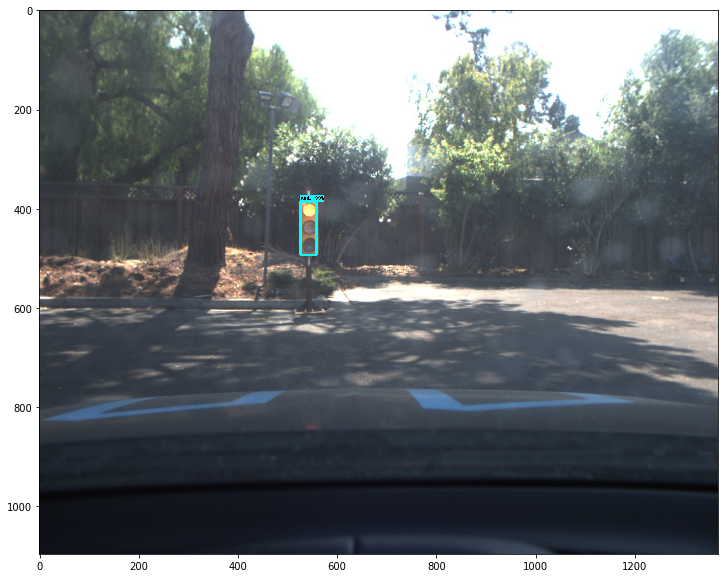

SCORES
[[0.9959155  0.00250071 0.00202965 0.00193409 0.00186128 0.00184593
  0.00180299 0.00173978 0.00170959 0.00163479]]
CLASSES
[[2. 4. 3. 4. 2. 2. 4. 4. 3. 1.]]


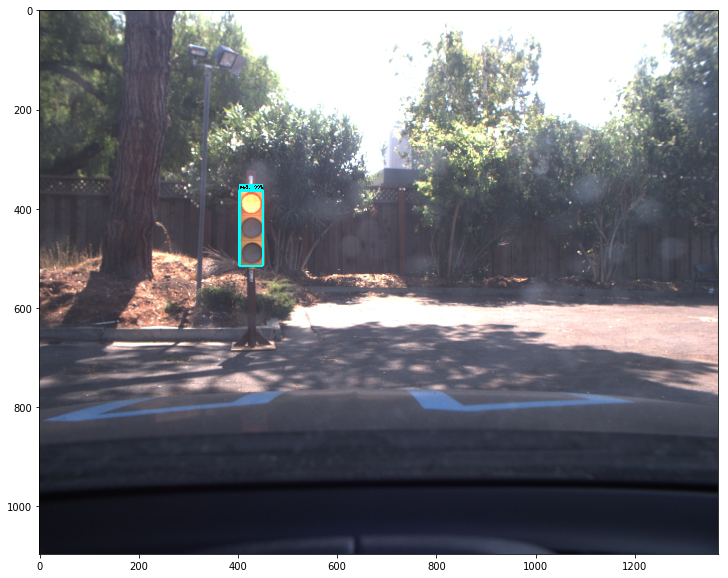

SCORES
[[0.9962016  0.00249984 0.00247206 0.00240876 0.00225741 0.00225089
  0.00221808 0.00209238 0.00202176 0.0019181 ]]
CLASSES
[[3. 4. 4. 1. 2. 2. 4. 4. 3. 1.]]


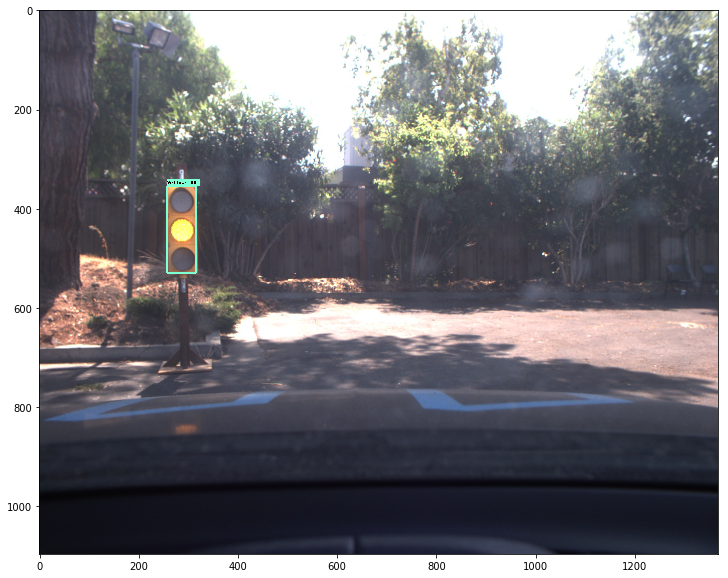

In [9]:
PATH_TO_IMGS = '/home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/google_colab_work/work/traffic_light_detection_dataset/real_test_imgs'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, '*.jpg'))
IMAGE_SIZE = (15, 10)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores)
            print('CLASSES')
            print(classes)
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=5)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break